In [1]:

import numpy as np  # library used for working with arrays
import pandas as pd # library used for data manipulation and analysis

import seaborn as sns # library for visualization
import matplotlib.pyplot as plt # library for visualization
%matplotlib inline


# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pima = pd.read_csv("diabetes.csv") # load and reads the csv file

In [4]:
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#  finds the number of columns in the dataset
total_cols=len(pima.axes[1])
print("Number of Columns: "+str(total_cols))

Number of Columns: 9


In [6]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# finds the number of rows in the dataset
total_rows=len(pima.axes[0])
print("Number of Rows: "+str(total_rows))


Number of Rows: 768


In [8]:
pima.ndim

2

In [9]:
pima.size

6912

In [11]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
pima.isnull().values.any()

False

In [13]:
pima.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [14]:
pima[pima['Glucose']==pima['Glucose'].max()]['BMI']

661    42.9
Name: BMI, dtype: float64

In [19]:
m1 = pima['BMI'].mean() # mean
print(m1)
m2 = pima['BMI'].median() # median
print(m2)
m3 = pima['BMI'].mode()[0] # mode 
print(m3)

31.992578124999998
32.0
32.0


In [16]:
m1

31.992578124999998

In [20]:
pima[pima['Glucose']>pima['Glucose'].mean()].shape[0]

349

In [21]:
pima1 = pima[(pima['BloodPressure']==pima['BloodPressure'].median()) & (pima['BMI']<pima['BMI'].median())]
number_of_women=len(pima1.axes[0])
print("Number of women:" +str(number_of_women))

Number of women:22


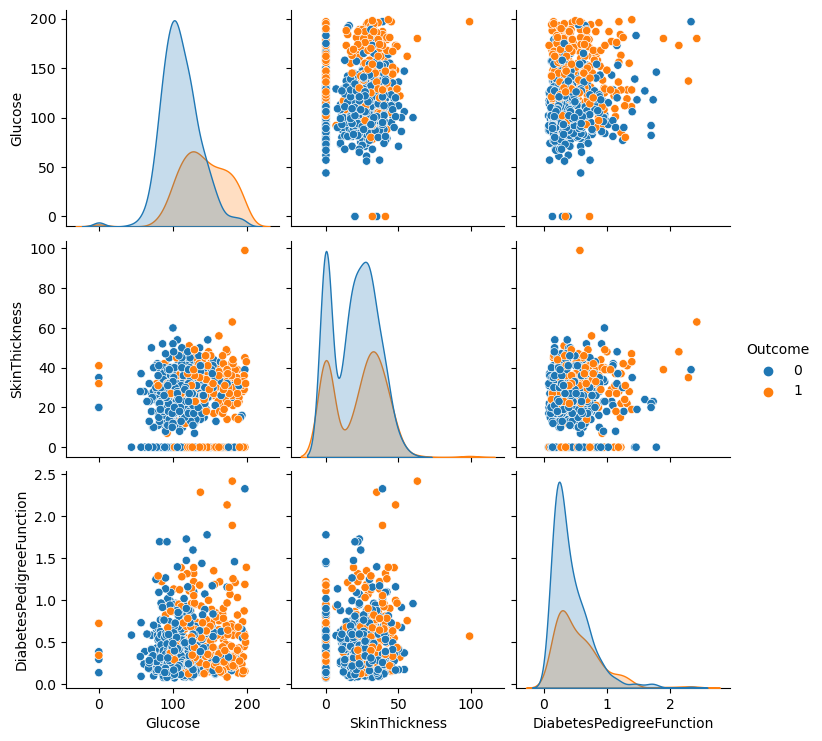

In [22]:
sns.pairplot(data=pima,vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue = 'Outcome')
plt.show()

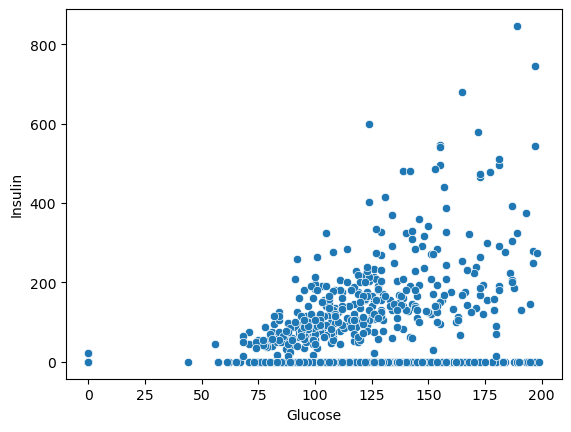

In [23]:
sns.scatterplot(x='Glucose',y='Insulin',data=pima)
plt.show()

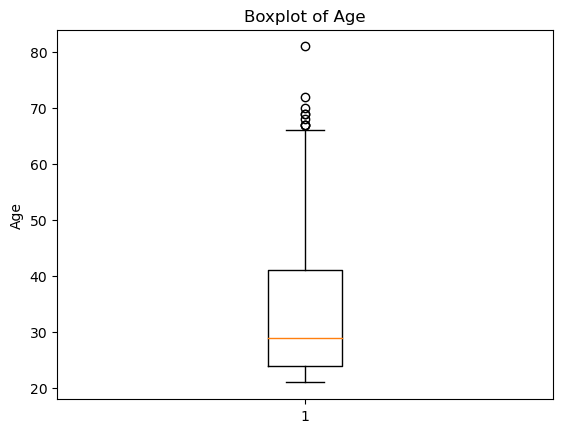

In [24]:
plt.boxplot(pima['Age'])

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

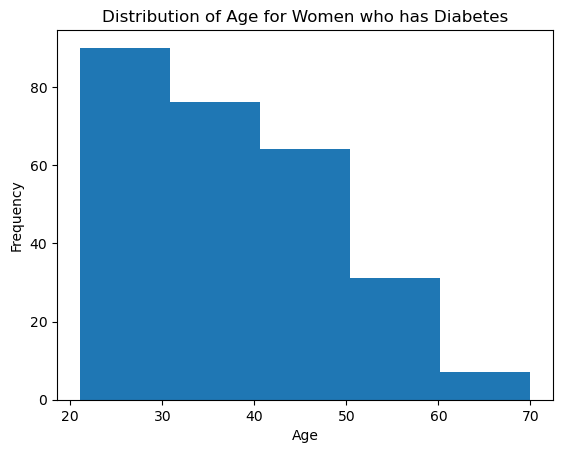

In [25]:
plt.hist(pima[pima['Outcome']==1]['Age'], bins = 5)
plt.title('Distribution of Age for Women who has Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

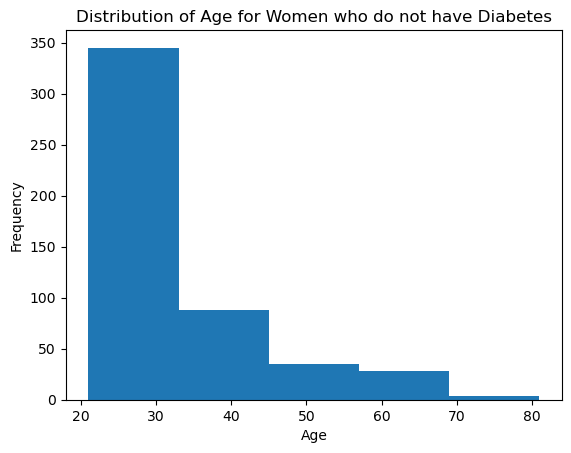

In [26]:
plt.hist(pima[pima['Outcome']==0]['Age'], bins = 5)
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [27]:
Q1 = pima.quantile(0.25)
Q3 = pima.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [28]:
corr_matrix = pima.iloc[:,0:8].corr()

corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


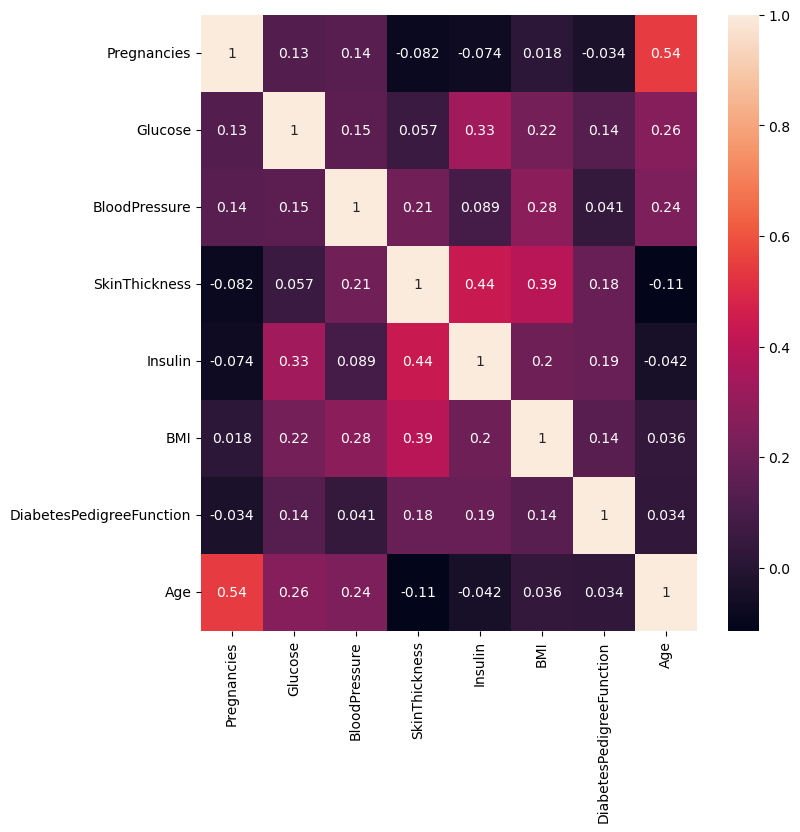

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)
plt.show()